## Data Mining and Analysis Course Project Team Details:
 
 ### Team Id: 6C2
 
 ### Team Details:
 
 Chandrashekhar Patil (244);
 Saikumar Mullalli (246);
 Saurav Suman (253);
 Shashwath Hiregoudar (256);

## Title:Militant operations of Indian Army


In [1]:
##Exploring Traveler data
import pandas as pd
import matplotlib.pyplot as plt
%pylab inline 
train_file="C:\\Users\\hp\\Desktop\\Desktop\\DMALab-master\\Project\deaths-in-india-satp-dfe_Final.csv"

data = pd.read_csv(train_file, header = 0,index_col=None)

Populating the interactive namespace from numpy and matplotlib


## Splitting Data into train data and test data

In [2]:
df_train = data.head(22000)

df_test = data.tail(5000)
df_test.drop('verb',axis = 1, inplace = True)

C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


## Conacatenate train and test data for Preprocessing

In [3]:
data = pd.concat((df_train, df_test), axis=0, ignore_index=True)

## Preprocessing 

In [4]:
#dropping _goden as this attribute contains same value for all of its records
data.drop('_golden', axis = 1, inplace = True)
print("Dropping _golden")

#dropping _unit_state as this attribute contains same value for all of its records
data.drop('_unit_state',axis = 1, inplace = True)
print("Dropping _unit_state")

#dropping _trusted_judgments as this attribute contains same value for all of its records
data.drop('_trusted_judgments',axis = 1, inplace = True)
print("Dropping _trusted_judgments")

#dropping _last_judgment_at as this does not help for our prediction
data.drop('_last_judgment_at',axis = 1, inplace = True)
print("Dropping _last_judgment_at")

#dropping _accuracy as this attribute contains same value for all of its records
data.drop('accuracy',axis = 1, inplace = True)
print("Dropping accuracy")

#dropping canddist as this attribute does not help for our prediction
data.drop('canddist',axis = 1, inplace = True)
print("Dropping canddist")

#dropping civilians_gold as this attribute contains same value for all of its records
data.drop('civilians_gold',axis = 1, inplace = True)
print("Dropping civilians_gold")

#dropping date as this attribute does not help for our prediction
data.drop('date',axis = 1, inplace = True)
print("Dropping date")

#dropping militants_terrorists_insurgents_gold as this attribute  does not contain any value for all of its records
data.drop('militants_terrorists_insurgents_gold',axis = 1, inplace = True)
print("Dropping militants_terrorists_insurgents_gold")

#droppin object as it is a redundant attribute
data.drop('object',axis = 1, inplace = True)
print("Dropping object")

#dropping objectcleanpp as this attribute does nothelp for our prediction
data.drop('objectcleanpp',axis = 1, inplace = True)
print("Dropping objectcleanpp")

#droppin object as it is a redundant attribute
data.drop('objectcount',axis = 1, inplace = True)
print("Dropping objectcount")

#droppin object as does not help for our prediction
data.drop('pid',axis = 1, inplace = True)
print("Dropping pid")

#droppin object as does not help for our prediction
data.drop('rid',axis = 1, inplace = True)
print("Dropping rid")

#dropping security_forces_gold as this attribute does not contain any value for all of its records
data.drop('security_forces_gold',axis = 1, inplace = True)
print("Dropping security_forces_gold")


#dropping objectcleanpp as this attribute does nothelp for our prediction
data.drop('sentence',axis = 1, inplace = True)
print("Dropping sentence")

#dropping sid as this attribute is not helpful possible prediction of future attacks
data.drop('sid',axis = 1, inplace = True)
print("Dropping sid")

#dropping srid as this attribute does not contain any value for all of its records
data.drop('srid',axis = 1, inplace = True)
print("Dropping srid")

#droppin state as it is a redundant attribute
data.drop('state',axis = 1, inplace = True)
print("Dropping state")

#droppin state as it is not helpful possible prediction of future attacks
data.drop('subject',axis = 1, inplace = True)
print("Dropping subject")

#dropping svmlabel2 as this attribute is not helpful possible prediction of future attacks
data.drop('svmlabel2',axis = 1, inplace = True)
print("Dropping svmlabel2")

#dropping svmlabel2prob as this attribute is not helpful possible prediction of future attacks
data.drop('svmlabel2prob',axis = 1, inplace = True)
print("Dropping svmlabel2prob")

#dropping svmobjecttypelab as this attribute contains same value for all of its records
data.drop('svmobjecttypelab',axis = 1, inplace = True)
print("Dropping svmobjecttypelab")

#dropping svmobjecttypeprob as this attribute is not helpful possible prediction of future attacks
data.drop('svmobjecttypeprob',axis = 1, inplace = True)
print("Dropping svmobjecttypeprob")

#dropping total_number_of_people_gold as this attribute does not contain any value for all of its records
data.drop('total_number_of_people_gold',axis = 1, inplace = True)
print("Dropping total_number_of_people_gold")


Dropping _golden
Dropping _unit_state
Dropping _trusted_judgments
Dropping _last_judgment_at
Dropping accuracy
Dropping canddist
Dropping civilians_gold
Dropping date
Dropping militants_terrorists_insurgents_gold
Dropping object
Dropping objectcleanpp
Dropping objectcount
Dropping pid
Dropping rid
Dropping security_forces_gold
Dropping sentence
Dropping sid
Dropping srid
Dropping state
Dropping subject
Dropping svmlabel2
Dropping svmlabel2prob
Dropping svmobjecttypelab
Dropping svmobjecttypeprob
Dropping total_number_of_people_gold


### Computing NULL values in all attributes

In [5]:


# Compute Null percentage of each feature.
df_all_null = (data.isnull().sum() / data.shape[0]) * 100
#df_all_null = (df_all.isnull().sum())
df_all_null[df_all_null > 0]

state_full    21.270370
verb          18.518519
dtype: float64

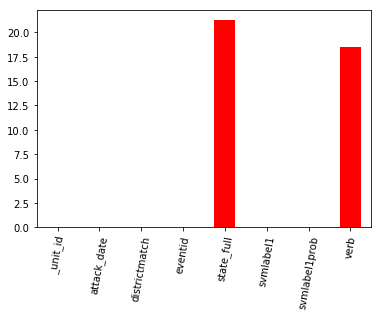

In [6]:
df_all_null.plot(kind="bar",color="red",rot=80)

## Filling missing values

In [7]:
# Fill state_full column
print("Filling state_full column...")
data['state_full'].fillna('NA', inplace=True)
print("Filling state_full column...completed")

Filling state_full column...
Filling state_full column...completed


## Data Transformation

In [9]:
date=data['attack_date']
import re
#print (date.dtype)
import datetime

for var in date:
    if(re.search("/",str(var))):
        var1=re.sub('/','-',str(var))
        var2=datetime.datetime.strptime(var1, '%m-%d-%y').date()
        data['attack_date'].replace(var,var2,inplace=True)
    else:
        if(re.match("[0-9]{4}-[0-9]{2}-[0-9]{2}",str(var))):
            var=var
        else:
            var2=datetime.datetime.strptime(str(var), '%m-%d-%y').strftime("%Y-%m-%d")
            data['attack_date'].replace(var,var2,inplace=True)
        
        
     


In [10]:
#converting into Standard date format Y-M-D
data['attack_date'] = pd.to_datetime(data['attack_date'], format='%Y-%m-%d')

In [11]:
data['attack_date']

0       2000-03-07
1       2000-03-07
2       2000-03-07
3       2000-03-07
4       2000-03-08
5       2000-03-08
6       2000-03-09
7       2000-03-09
8       2000-03-12
9       2000-03-12
10      2000-03-13
11      2000-03-14
12      2000-03-15
13      2000-03-15
14      2000-03-15
15      2000-03-15
16      2000-03-15
17      2000-03-16
18      2000-03-17
19      2000-03-17
20      2000-03-17
21      2000-03-18
22      2000-03-18
23      2000-03-18
24      2000-03-18
25      2000-03-18
26      2000-03-18
27      2000-03-21
28      2000-03-21
29      2000-03-22
           ...    
26970   2009-09-19
26971   2006-05-03
26972   2002-02-19
26973   2006-07-15
26974   2002-01-13
26975   2010-05-13
26976   2010-11-08
26977   2006-09-21
26978   2008-06-14
26979   2000-03-18
26980   2010-01-11
26981   2006-09-10
26982   2011-07-24
26983   2013-04-08
26984   2005-05-25
26985   2000-07-14
26986   2001-05-20
26987   2001-01-16
26988   2010-08-13
26989   2000-11-29
26990   2006-04-11
26991   2008

## Data addition

In [12]:
#adding new columns
data['attack_month'] = data['attack_date'].dt.month
data['attack_day'] = data['attack_date'].dt.day

In [13]:
data.drop('attack_date',axis = 1, inplace = True)

## Data transformation

In [14]:
#replacing similar data of the attribute
replaceVerb=data['verb']
import re

for var in replaceVerb:
    if(re.search("killing",str(var)) or re.search("kill",str(var))):
        var2='killed'
        data['verb'].replace(var,var2,inplace=True)
    elif(re.search("arresting",str(var)) or re.search("arrest",str(var))):
        var2='arrested'
        data['verb'].replace(var,var2,inplace=True)
    elif(re.search("surrender",str(var)) or re.search("surrendering",str(var))):
        var2='surrendered'
        data['verb'].replace(var,var2,inplace=True)
    elif(re.search("injuring",str(var)) or re.search("injure",str(var))):
        var2='injured'
        data['verb'].replace(var,var2,inplace=True)

## One Hot Encoding 

In [15]:
def convert_to_binary(df, column_to_convert):
    categories = list(df[column_to_convert].drop_duplicates())

    for category in categories:
        cat_name = str(category).replace(" ", "_").replace("(", "").replace(")", "").replace("/", "_").replace("-", "").lower()
        col_name = column_to_convert[:4] + '_' + cat_name[:10]
        df[col_name] = 0
        df.loc[(df[column_to_convert] == category), col_name] = 1

    return df

# One Hot Encoding
print("One Hot Encoding categorical data...")
columns_to_convert = ['state_full','svmlabel1','districtmatch']

for column in columns_to_convert:
    data = convert_to_binary(data,column)
    data.drop(column, axis=1, inplace=True)
print("One Hot Encoding categorical data...completed")

One Hot Encoding categorical data...
One Hot Encoding categorical data...completed


In [16]:
#to find total number of deaths based on profession 
security=data['svml_security'].sum()

terrorist=data['svml_terrorist'].sum()

civilian=data['svml_civilian'].sum()

public=data['svml_public'].sum()

private=data['svml_private'].sum()


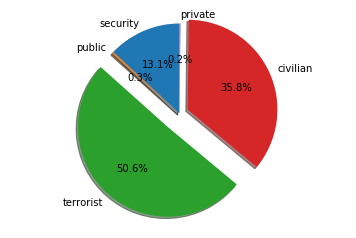

In [17]:
# Pie chart
labels = 'security','public', 'terrorist', 'civilian' ,'private'
sizes = [security,public,terrorist,civilian,private]
explode = (0, 0, 0.2, 0.1, 0)  

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode =explode ,labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')

plt.show()

In [18]:
#from above pie cart we can say that major part of killed were terrorists

## Save Preprocessed Data to csv file

In [19]:
file4 = 'C:\\Users\\hp\\Desktop\\Desktop\\DMALab-master\\Project\\preprocessed.csv'
data.to_csv(file4)

In [15]:
#create data frame for classification

df_all =  pd.DataFrame(data=data)

## Split preprocessed data into train data and test data

In [17]:
df_train = df_all.head(22000)
df_test = df_all.tail(5000)
df_all1 = df_all

In [18]:
#dropping column which we want to predivt from test data
df_test.drop('verb',axis = 1, inplace = True)

C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [19]:
df_all.drop('verb',axis = 1, inplace = True)

In [21]:
#temporary variables
df_train1 = df_train
df_test1 = df_test
df_all1 = df_all

In [22]:
df_train1.columns

Index(['_unit_id', 'eventid', 'svmlabel1prob', 'verb', 'attack_month',
       'attack_day', 'stat_jammu_and_', 'stat_na', 'stat_assam',
       'stat_manipur',
       ...
       'dist_parganas_n', 'dist_sheopur', 'dist_dantewara', 'dist_mandsaur',
       'dist_moradabad', 'dist_west_medin', 'dist_sikar', 'dist_almora',
       'dist_datiya', 'dist_gautambudh'],
      dtype='object', length=580)

In [23]:
df_train['verb'].head()

0         killed
1         killed
2       arrested
3    surrendered
4         killed
Name: verb, dtype: object

In [24]:
df_test1.columns

Index(['_unit_id', 'eventid', 'svmlabel1prob', 'attack_month', 'attack_day',
       'stat_jammu_and_', 'stat_na', 'stat_assam', 'stat_manipur',
       'stat_bihar',
       ...
       'dist_parganas_n', 'dist_sheopur', 'dist_dantewara', 'dist_mandsaur',
       'dist_moradabad', 'dist_west_medin', 'dist_sikar', 'dist_almora',
       'dist_datiya', 'dist_gautambudh'],
      dtype='object', length=579)

In [25]:
df_all.columns

Index(['_unit_id', 'eventid', 'svmlabel1prob', 'attack_month', 'attack_day',
       'stat_jammu_and_', 'stat_na', 'stat_assam', 'stat_manipur',
       'stat_bihar',
       ...
       'dist_parganas_n', 'dist_sheopur', 'dist_dantewara', 'dist_mandsaur',
       'dist_moradabad', 'dist_west_medin', 'dist_sikar', 'dist_almora',
       'dist_datiya', 'dist_gautambudh'],
      dtype='object', length=579)

In [26]:
#seeting _unit_id as a index of dataframe
df_train1.set_index('_unit_id', inplace=True)


## Label Encoding for Categorical data

In [27]:
from sklearn.preprocessing import LabelEncoder

id_train = df_train1.index.values
labels = df_train1['verb']

# Label encoding for the categorical data eg: ...NDF -> 7, US -> 10...
le = LabelEncoder()
y = le.fit_transform(labels)
X = df_train1.drop('verb', axis=1, inplace=False)

In [28]:
X.shape

(22000, 578)

In [29]:
X.head()

,eventid,svmlabel1prob,attack_month,attack_day,stat_jammu_and_,stat_na,stat_assam,stat_manipur,stat_bihar,stat_maharashtr,...,dist_parganas_n,dist_sheopur,dist_dantewara,dist_mandsaur,dist_moradabad,dist_west_medin,dist_sikar,dist_almora,dist_datiya,dist_gautambudh
_unit_id,,,,,,,,,,,,,,,,,,,,,
711601341,3,0.997059,3,7,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
711601342,4,0.979219,3,7,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
711601343,13,0.948564,3,7,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
711601344,15,0.999999,3,7,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
711601345,41,0.858030,3,8,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [30]:
from sklearn import cross_validation
## Spliting of training dataset into 70% training data and 30% testing data randomly
features_train, features_test, labels_train, labels_test = cross_validation.train_test_split(X, y, test_size=0.3, random_state=42)

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


## Decission tree Classifier

In [52]:
## Decision Tree 
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf.fit(features_train, labels_train)
prediction = clf.predict(features_test)
## Computing accuracy
from sklearn.metrics import accuracy_score
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 87.82%


## Gaussian Naive Bayes Classifier

In [55]:
## Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(features_train, labels_train)
prediction = clf.predict(features_test)
## Computing accuracy
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 84.12%


## SVM Classifier

In [56]:
## SVM 
from sklearn import svm
clf = svm.SVC(kernel="rbf") 
clf.fit(features_train, labels_train)
prediction = clf.predict(features_test)
## Computing accuracy
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 85.14%


## APPROACH 02:

In [34]:
## Importing the classifier libraries
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LogisticRegressionCV
from xgboost.sklearn import XGBClassifier


In [35]:
random_state = 42

#Spliting data into train and test sets.
XA, X_testA, yA, y_testA = train_test_split(X, y, test_size=0.2, 
                                        random_state=random_state)
    
#Spliting train data into training and validation sets.
X_trainA, X_validA, y_trainA, y_validA = train_test_split(XA, yA, test_size=0.25, 
                                                      random_state=random_state)

print('Data shape:')
print('X_trainA: %s, X_validA: %s, X_testA: %s \n' %(X_trainA.shape, X_validA.shape, 
                                                     X_testA.shape))

Data shape:
X_trainA: (13200, 578), X_validA: (4400, 578), X_testA: (4400, 578) 



In [36]:
from sklearn.metrics import log_loss
#Defining the classifiers
clfs = { 'SVM' : SVC(probability=True, random_state=random_state), 
        'RF'  : RandomForestClassifier(n_estimators=100, n_jobs=-1, 
                                       random_state=random_state), 
        'GBM' : GradientBoostingClassifier(n_estimators=50, 
                                           random_state=random_state), 
        'KNN' : KNeighborsClassifier(n_neighbors=30)}
    
#predictions on the validation and test sets
p_valid = []
p_test = []
   
print('Performance of individual classifiers (1st layer) on X_testA')   
print('------------------------------------------------------------')
   
for nm, clf in clfs.items():
    #First run. Training on (X_trainA, y_trainA) and predicting on X_validA.
    clf.fit(X_trainA, y_trainA)
    yv = clf.predict_proba(X_validA)
    p_valid.append(yv)
        
    #Second run. Training on (XA, yA) and predicting on X_testA.
    clf.fit(XA, yA)
    yt = clf.predict_proba(X_testA)
    p_test.append(yt)
       
    #Printing out the performance of the classifier
    print('{:10s} {:2s} {:1.7f}'.format('%s: ' %(nm), 'logloss  =>', log_loss(y_testA, yt)))
print('')

Performance of individual classifiers (1st layer) on X_testA
------------------------------------------------------------
SVM:       logloss  => 1.1046597
RF:        logloss  => 1.1587623
GBM:       logloss  => 0.8833187
KNN:       logloss  => 1.6210218



In [ ]:
#from above logloss values we came to know that GBM has a less error rate 
#compared to other classification models

In [37]:
#Creating the data for the 2nd layer.
XV = np.hstack(p_valid)
XT = np.hstack(p_test)

#By default the best C parameter is obtained with a cross-validation approach, doing grid search with
#10 values defined in a logarithmic scale between 1e-4 and 1e4.
#Change parameters to see how they affect the final results.
lr = LogisticRegressionCV(Cs=10, dual=False, fit_intercept=True, 
                          intercept_scaling=1.0, max_iter=25,
                          multi_class='ovr', n_jobs=1, penalty='l2', 
                          random_state=random_state,
                          solver='lbfgs', tol=0.0001)

lr.fit(XV, y_validA)
y_lr = lr.predict_proba(XT)
print('{:20s} {:2s} {:1.7f}'.format('Log_Reg:', 'logloss  =>', log_loss(y_testA, y_lr)))

Log_Reg:             logloss  => 0.8631249


## XGBoost Classifier

In [46]:

# train-test split evaluation of xgboost model
#from numpy import loadtxt
#from xgboost import XGBClassifier
#from sklearn.model_selection import train_test_split
#from sklearn.metrics import accuracy_score

# split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(XA, yA, test_size=0.33, random_state=7)
# fit model no training data
model = XGBClassifier()
model.fit(X_train, y_train)
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 83.72%
